<a href="https://colab.research.google.com/github/Levelearn/data-analysis/blob/main/mutiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [78]:
# 1. Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

**2. Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
file_path = '/content/drive/MyDrive/Levelearn/dataset_levelearn_heart.csv'

df = pd.read_csv(file_path, encoding="latin-1", sep=";")
df.head()

,Timestamp,Email,Nama,NIM,Angkatan,Happiness_Q1,Happiness_Q2,Happiness_Q3,Happiness_Q4,Happiness_Q5,...,TaskSuccess_Q4,TaskSuccess_Q5,Qualitative_Q1,Qualitative_Q2,Qualitative_Q3,Qualitative_Q4,Feedback,Error,Suggestion,File
0,3/26/2025 11:44:39,gloriapanjaitan3012@gmail.com,Gloria Panjaitan,11S23030,2023,5,4,4,5,5,...,4,5,Leaderboard,Tidak,Tidak,Lebih seru dan menarik,Sudah di upload,Sudah di upload,Menambahkan animasi sederhana,https://drive.google.com/open?id=1UWwnVxfv8Sn8...
1,3/26/2025 11:45:03,andresaragih932@gmail.com,Andre Christian Saragih,11S23026,2023,5,5,5,5,5,...,5,5,Point\n\nKarena pointnya dapat ditukarkan dan ...,Tidak,Tidak,Gamifikasi meningkatkan kualitas belajar saya,Sangat bagus,Sudah di uppload,Sudah baik,https://drive.google.com/open?id=1yJpmGPuwsZ1A...
2,3/26/2025 11:45:24,firenoobgaming@gmail.com,Josua,11S23033,2023,3,3,5,4,3,...,3,3,Progress bar,Tidak,Tidak ada sejauh ini,Sama aja,Di foto,Banyak,Ada di foto,https://drive.google.com/open?id=1-51jAdyASsbI...
3,3/26/2025 11:46:16,josuaasrgh@gmail.com,Josua Saragih,11S23028,2023,5,5,4,4,4,...,3,4,Leaderboard,tidak,tidak ada,"lebih seru, dan jadi berpacu untuk belajar",aplikasi nya bagus untuk memacu mahasiswa untu...,1. tombol back tidak berfungsi dengan baik\n2....,UI nya lebih menarik lagi,NaN
4,3/26/2025 11:47:18,christopasaribu90@gmail.com,Christo Pasaribu,11S23005,2023,5,5,5,4,4,...,4,4,"Point, karena ingin menukar nya dengan hadiah",Tidak,Tidak,Sebelum ada fitur gamifikasi tidak ada niatan ...,NaN,Jumlah soal yang benar tidak sesuai dengan jum...,Menurut saya sudah pass mantapp\n,NaN


**3. Define Variables**

In [74]:
# 3. Definisikan variabel independen (elemen gamifikasi)
gamification_columns = [
    'Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5',
    'Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5',
    'Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5',
    'Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5',
    'TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5'
]

# 4. Menghitung rata-rata untuk setiap metrik UX (Happiness, Engagement, Adoption, Retention, Task Success)
df['Happiness'] = df[['Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5']].mean(axis=1)
df['Engagement'] = df[['Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5']].mean(axis=1)
df['Adoption'] = df[['Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5']].mean(axis=1)
df['Retention'] = df[['Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5']].mean(axis=1)
df['TaskSuccess'] = df[['TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5']].mean(axis=1)

# 5. Definisikan variabel dependen (semua metrik UX)
dependent_variables = ['Happiness', 'Engagement', 'Adoption', 'Retention', 'TaskSuccess']

**4. Standarization of Variable X**

In [75]:
# 6. Standarisasi variabel X (elemen gamifikasi)
X = df[gamification_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Membagi data menjadi training dan testing (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df[dependent_variables], test_size=0.2, random_state=42)

In [68]:
# 5. Uji Multikolinearitas (VIF)
X_vif = add_constant(X_scaled)  # Menambahkan konstanta (intercept) ke variabel independen
vif_df = pd.DataFrame()
vif_df["Variable"] = ["const"] + gamification_columns
vif_df["VIF"] = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]
print("==== HASIL VIF ====")
print(vif_df.sort_values(by="VIF", ascending=False))

==== HASIL VIF ====
          Variable       VIF
25  TaskSuccess_Q5  8.993743
23  TaskSuccess_Q3  8.100060
2     Happiness_Q2  7.203608
4     Happiness_Q4  7.114184
9    Engagement_Q4  6.353188
22  TaskSuccess_Q2  6.317579
24  TaskSuccess_Q4  6.007374
18    Retention_Q3  5.864675
21  TaskSuccess_Q1  5.478964
16    Retention_Q1  5.323418
5     Happiness_Q5  5.160198
20    Retention_Q5  5.144153
17    Retention_Q2  5.087963
19    Retention_Q4  5.031702
6    Engagement_Q1  4.764525
10   Engagement_Q5  4.517712
12     Adoption_Q2  4.432213
11     Adoption_Q1  4.275723
1     Happiness_Q1  4.235950
13     Adoption_Q3  4.013785
7    Engagement_Q2  3.145473
8    Engagement_Q3  2.894915
15     Adoption_Q5  2.738211
3     Happiness_Q3  2.593885
14     Adoption_Q4  2.529073
0            const  1.000000


In [76]:
# 8. Ridge Regression untuk Regularisasi
ridge_model = Ridge(alpha=1.0)  # Regularisasi Ridge dengan alpha = 1
ridge_model.fit(X_train, y_train)

# 9. Prediksi dengan data testing
y_pred_ridge = ridge_model.predict(X_test)

# 10. Evaluasi model Ridge
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# 11. Menampilkan hasil evaluasi
print("\n==== HASIL REGRESI RIDGE ====")
print(f"R² pada data test: {r2_ridge:.4f}")
print(f"Mean Squared Error: {mse_ridge:.5f}")


==== HASIL REGRESI RIDGE ====
R² pada data test: 0.9985
Mean Squared Error: 0.00056



==== Koefisien Ridge ====
                Happiness  Engagement  Adoption  Retention  TaskSuccess
Happiness_Q1     0.118362    0.002829  0.005339  -0.002501     0.001654
Happiness_Q2     0.152747    0.000319 -0.007821   0.002979     0.002682
Happiness_Q3     0.185339   -0.002163  0.000241  -0.001229    -0.000865
Happiness_Q4     0.132789    0.001871  0.001312   0.013770     0.002043
Happiness_Q5     0.150584    0.005732  0.005094   0.002656    -0.001664
Engagement_Q1   -0.003776    0.143092 -0.004415   0.009033    -0.002228
Engagement_Q2    0.005084    0.140349 -0.002688   0.002782    -0.000277
Engagement_Q3   -0.003224    0.175370  0.002163  -0.000415     0.003686
Engagement_Q4    0.006367    0.148869 -0.000052   0.000839     0.001875
Engagement_Q5    0.003540    0.146542  0.009999   0.003679    -0.000966
Adoption_Q1     -0.001579    0.004992  0.122680   0.006992    -0.000844
Adoption_Q2     -0.002314   -0.004759  0.157200   0.004535     0.000395
Adoption_Q3      0.000595    0.003436

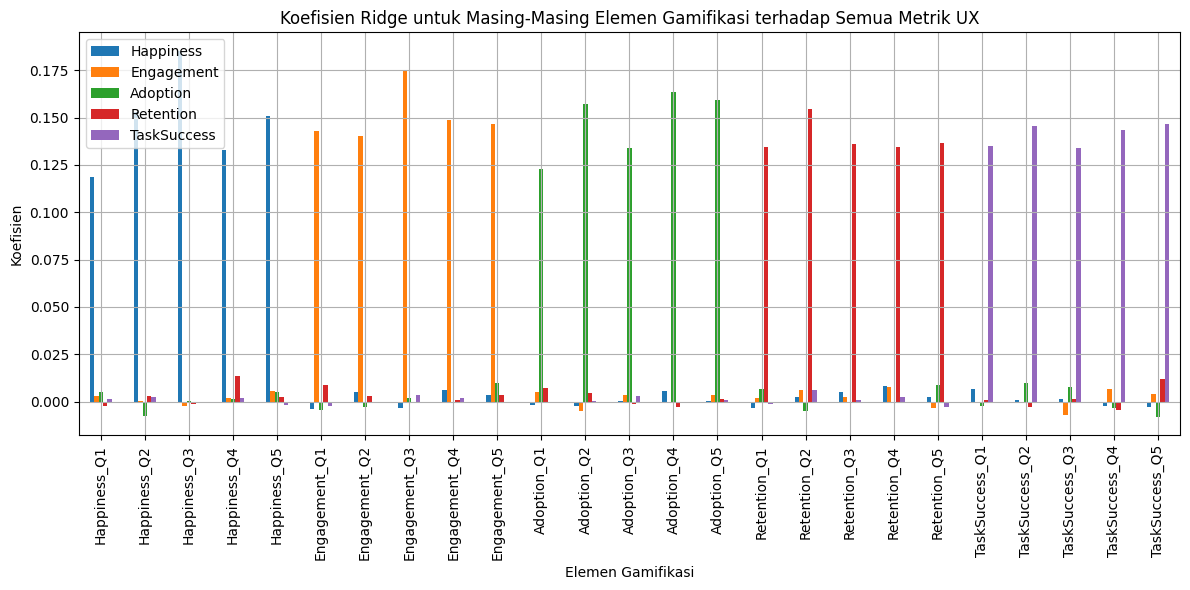

In [80]:
# 12. Menampilkan koefisien Ridge untuk masing-masing elemen gamifikasi
coef_df = pd.DataFrame(ridge_model.coef_.T, index=gamification_columns, columns=dependent_variables)
print("\n==== Koefisien Ridge ====")
print(coef_df)

# 13. Visualisasi Koefisien
import matplotlib.pyplot as plt
coef_df.plot(kind='bar', figsize=(12, 6), legend=True)
plt.title("Koefisien Ridge untuk Masing-Masing Elemen Gamifikasi terhadap Semua Metrik UX")
plt.ylabel("Koefisien")
plt.xlabel("Elemen Gamifikasi")
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
# 9. Regresi Linear Berganda untuk setiap variabel dependen (HEART)
for aspect, cols in dependent_variables.items():
    y = df[cols].mean(axis=1)  # Mengambil rata-rata untuk variabel dependen saat ini

    # Membuat model OLS
    X_with_const = sm.add_constant(X_scaled)  # Menambahkan konstanta ke data independen
    model = sm.OLS(y, X_with_const).fit()

    # Menampilkan hasil regresi untuk setiap metrik HEART
    print(f"\n==== HASIL REGRESI LINEAR [{aspect}] ====")
    print(model.summary())


==== HASIL REGRESI LINEAR [Happiness] ====
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.528e+28
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:35:12   Log-Likelihood:                 1744.9
No. Observations:                  54   AIC:                            -3438.
Df Residuals:                      28   BIC:                            -3386.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   